# 演练2.1

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *


LetsPlot.setup_html(no_js=True)


### You don't need to use these settings yourself
### — they are just here to make the book look nicer!
# Set the plot style for prettier charts:
plt.style.use(

    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

d:\python_Path\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
Bad value in file 'https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt', line 24 ('legend.loc: "upper left"'): Key legend.loc: '"upper left"' is not a valid value for legend.loc; supported values are ['best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']; remove quotes surrounding your string

In [2]:
data = {
    "Copenhagen": [14.1, 14.1, 13.7, 12.9, 12.3, 11.7, 10.8, 10.6, 9.8, 5.3],
    "Dniprop": [11.0, 12.6, 12.1, 11.2, 11.3, 10.5, 9.5, 10.3, 9.0, 8.7],
    "Minsk": [12.8, 12.3, 12.6, 12.3, 11.8, 9.9, 9.9, 8.4, 8.3, 6.9],
}


df = pd.DataFrame.from_dict(data)
df.head()

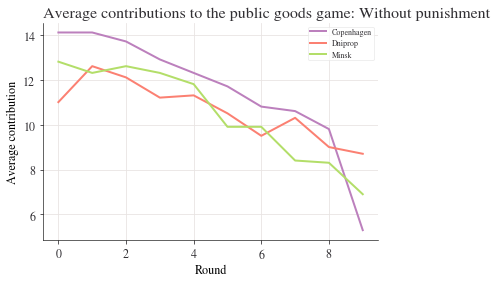

In [3]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

## 演练2.2

In [4]:
data_np = pd.read_excel(
    "data/doing-economics-datafile-working-in-excel-project-2.xlsx",
    usecols="A:Q",
    header=1,
    index_col="Period",
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

In [5]:
test_data = {
    "City A": [14.1, 14.1, 13.7],
    "City B": [11.0, 12.6, 12.1],
}


# Original dataframe
test_df = pd.DataFrame.from_dict(test_data)
# A copy of the dataframe
test_copy = test_df.copy()
# A pointer to the dataframe
test_pointer = test_df


test_pointer.iloc[1, 1] = 99

In [6]:
print("test_df=")
print(f"{test_df}\n")
print("test_copy=")
print(f"{test_copy}\n")

test_df=
   City A  City B
0    14.1    11.0
1    14.1    99.0
2    13.7    12.1

test_copy=
   City A  City B
0    14.1    11.0
1    14.1    12.6
2    13.7    12.1


In [7]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB

In [8]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")

## 演练2.3

In [9]:
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)

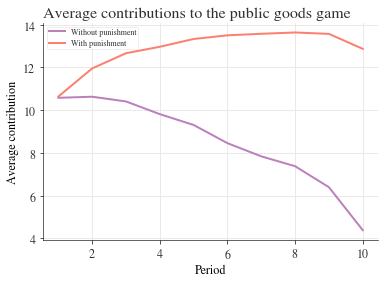

In [10]:
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

## 演练2.4

In [11]:
partial_names_list = ["F. Kennedy", "Lennon", "Maynard Keynes", "Wayne"]
["John " + name for name in partial_names_list]

['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

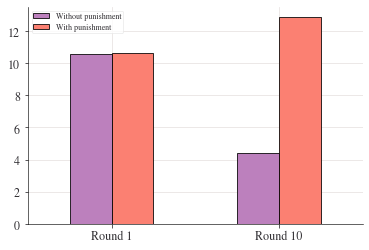

In [12]:
# Create new dataframe with bars in
compare_grps = pd.DataFrame(
    [mean_n_c.loc[[1, 10]], mean_p_c.loc[[1, 10]]],
    index=["Without punishment", "With punishment"],
)
# Rename columns to have 'round' in them
compare_grps.columns = ["Round " + str(i) for i in compare_grps.columns]
# Swap the column and index variables around with the transpose function, ready for plotting (.T is transpose)
compare_grps = compare_grps.T
# Make a bar chart
compare_grps.plot.bar(rot=0);

## 演练2.5

In [13]:
n_c = data_n.agg(["std", "var", "mean"], 1)
n_c

In [14]:
p_c = data_p.agg(["std", "var", "mean"], 1)

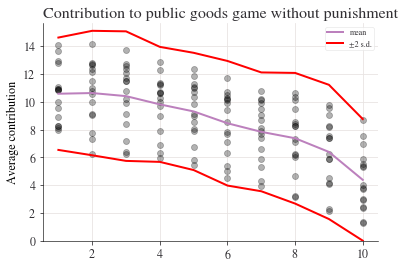

In [15]:
fig, ax = plt.subplots()
n_c["mean"].plot(ax=ax, label="mean")
# mean + 2 standard deviations
(n_c["mean"] + 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 standard deviations
(n_c["mean"] - 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_n.columns)):
    ax.scatter(x=data_n.index, y=data_n.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game without punishment")
plt.show();

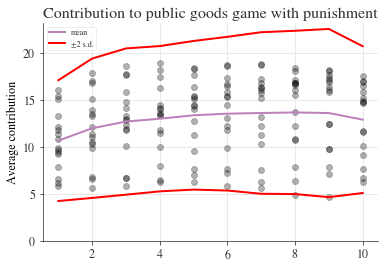

In [16]:
fig, ax = plt.subplots()
p_c["mean"].plot(ax=ax, label="mean")
# mean + 2 sd
(p_c["mean"] + 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 sd
(p_c["mean"] - 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_p.columns)):
    ax.scatter(x=data_p.index, y=data_p.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game with punishment")
plt.show();

## 演练2.6

In [17]:
data_p.apply(lambda x: x.max() - x.min(), axis=1)

Period
1     10.199675
2     12.185065
3     12.689935
4     12.625000
5     12.140375
6     12.827541
7     13.098931
8     13.482621
9     13.496754
10    11.307360
dtype: float64

In [18]:
# A lambda function accepting three inputs, a, b, and c, and calculating the sum of the squares
test_function = lambda a, b, c: a**2 + b**2 + c**2


# Now we apply the function by handing over (in parenthesis) the following inputs: a=3, b=4 and c=5
test_function(3, 4, 5)

50

In [19]:
range_function = lambda x: x.max() - x.min()
range_p = data_p.apply(range_function, axis=1)
range_n = data_n.apply(range_function, axis=1)

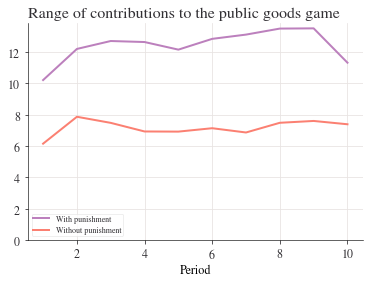

In [20]:
fig, ax = plt.subplots()
range_p.plot(ax=ax, label="With punishment")
range_n.plot(ax=ax, label="Without punishment")
ax.set_ylim(0, None)
ax.legend()
ax.set_title("Range of contributions to the public goods game")
plt.show();

## 演练2.7

In [21]:
funcs_to_apply = [range_function, "max", "min", "std", "mean"]
summ_p = data_p.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})
summ_n = data_n.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})

In [22]:
summ_n.loc[[1, 10], :].round(2)

In [23]:
summ_p.loc[[1, 10], :].round(2)

## 演练2.8

In [24]:
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :])

In [25]:
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :], paired=True)